No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00
No data found for date 2020-01-07 00:00:00
No data found for date 2020-01-08 00:00:00
No data found for date 2020-01-09 00:00:00
No data found for date 2020-01-10 00:00:00
No data found for date 2020-01-11 00:00:00
No data found for date 2020-01-12 00:00:00
No data found for date 2020-01-13 00:00:00
No data found for date 2020-01-14 00:00:00
No data found for date 2020-01-15 00:00:00
No data found for date 2020-01-16 00:00:00
No data found for date 2020-01-17 00:00:00
No data found for date 2020-01-18 00:00:00
No data found for date 2020-01-19 00:00:00
No data found for date 2020-01-20 00:00:00
No data found for date 2020-01-21 00:00:00
No data found for date 2020-01-22 00:00:00
No data found for date 2020-01-23 00:00:00
No data fou

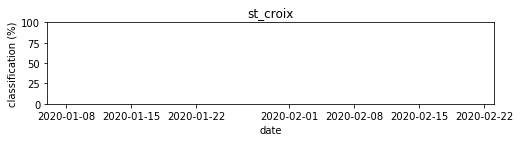

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


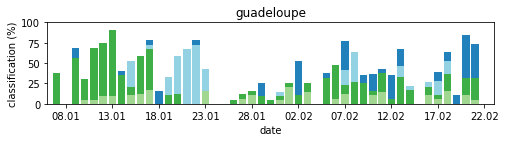

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


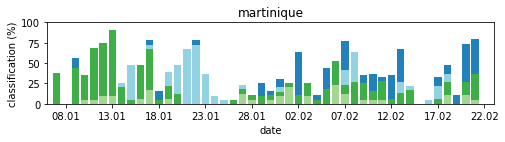

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


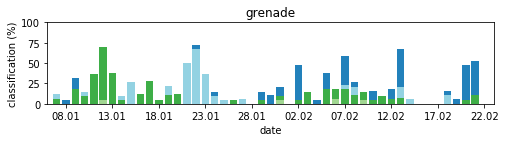

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


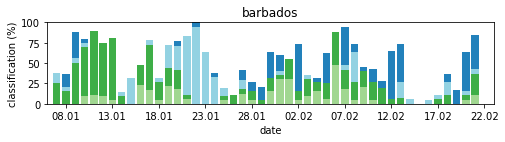

In [22]:

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Workflow as given in l3 output
workflow = 'IR'

# Level3 filename (input)
level3_file = '../processed_data/EUREC4A_ManualClassifications_l3_{workflow}.zarr'.format(workflow=workflow)

ds = xr.open_zarr(level3_file)

color_dict = {'Flowers':'#2281BB',
              'Fish': '#93D2E2',
              'Gravel': '#3EAE47',
              'Sugar': '#A1D791'}


dates_of_interest = pd.date_range("2020-01-01", "2020-02-21")

station_dict = {
    "st_croix" : (17.7293395,-64.8044103),
    "guadeloupe" : (16.30,-61.07),
    "martinique" : (14.60,-61.06),
    "grenade" : (12.22, -61.64),
    "barbados" : (13.16, -59.42)
}

for station, coords in station_dict.items():
    lat, lon = coords

    frequency = np.zeros((len(dates_of_interest)))

    fig, ax = plt.subplots(figsize=(8,1.5))
    plt.title(station)

    for d, date in enumerate(dates_of_interest):
        frequency = 0
        for p in ['Sugar', 'Gravel', 'Fish', 'Flowers']:
            try:
                # Actually loading the data
                data = ds.freq.sel(latitude=lat, longitude=lon, method='nearest', tolerance=0.1).sel(date=date, pattern=p).values *100
            except KeyError:
                print('No data found for date {}'.format(date))
                break
            if np.isnan(data):
                data = 0
            ax.bar(dates.date2num(date), data, label=p, bottom=frequency, color=color_dict[p])
            hfmt = dates.DateFormatter('%d.%m')
            ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
            ax.xaxis.set_major_formatter(hfmt)
            frequency += data
        if d == 0:
            plt.legend(frameon=False, bbox_to_anchor=(1,1))
    plt.xlabel('date')
    plt.ylabel('classification (%)')
    plt.xlim(dt.datetime(2020,1,6), dt.datetime(2020,2,23))
    plt.ylim(0,100)
    plt.show()

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00
No data found for date 2020-01-07 00:00:00
No data found for date 2020-01-08 00:00:00
No data found for date 2020-01-09 00:00:00
No data found for date 2020-01-10 00:00:00
No data found for date 2020-01-11 00:00:00
No data found for date 2020-01-12 00:00:00
No data found for date 2020-01-13 00:00:00
No data found for date 2020-01-14 00:00:00
No data found for date 2020-01-15 00:00:00
No data found for date 2020-01-16 00:00:00
No data found for date 2020-01-17 00:00:00
No data found for date 2020-01-18 00:00:00
No data found for date 2020-01-19 00:00:00
No data found for date 2020-01-20 00:00:00
No data found for date 2020-01-21 00:00:00
No data found for date 2020-01-22 00:00:00
No data found for date 2020-01-23 00:00:00
No data fou

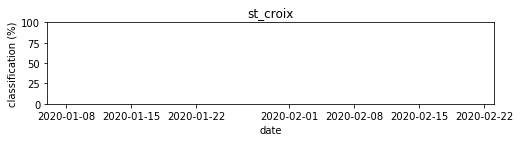

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


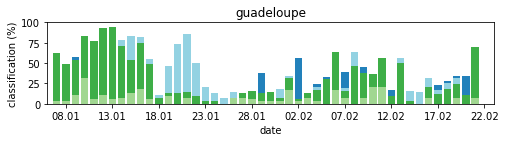

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


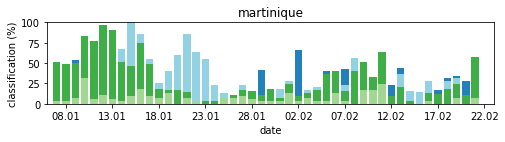

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


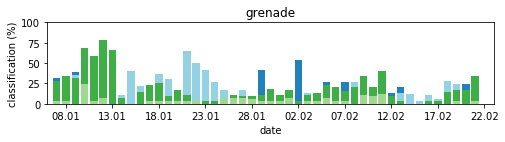

No handles with labels found to put in legend.


No data found for date 2020-01-01 00:00:00
No data found for date 2020-01-02 00:00:00
No data found for date 2020-01-03 00:00:00
No data found for date 2020-01-04 00:00:00
No data found for date 2020-01-05 00:00:00
No data found for date 2020-01-06 00:00:00


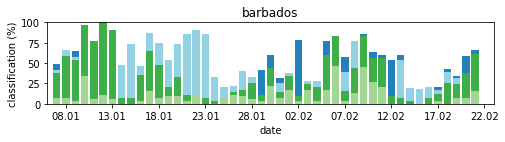

In [23]:

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Workflow as given in l3 output
workflow = 'VIS'

# Level3 filename (input)
level3_file = '../processed_data/EUREC4A_ManualClassifications_l3_{workflow}.zarr'.format(workflow=workflow)

ds = xr.open_zarr(level3_file)

color_dict = {'Flowers':'#2281BB',
              'Fish': '#93D2E2',
              'Gravel': '#3EAE47',
              'Sugar': '#A1D791'}


dates_of_interest = pd.date_range("2020-01-01", "2020-02-21")

station_dict = {
    "st_croix" : (17.7293395,-64.8044103),
    "guadeloupe" : (16.30,-61.07),
    "martinique" : (14.60,-61.06),
    "grenade" : (12.22, -61.64),
    "barbados" : (13.16, -59.42)
}

for station, coords in station_dict.items():
    lat, lon = coords

    frequency = np.zeros((len(dates_of_interest)))

    fig, ax = plt.subplots(figsize=(8,1.5))
    plt.title(station)

    for d, date in enumerate(dates_of_interest):
        frequency = 0
        for p in ['Sugar', 'Gravel', 'Fish', 'Flowers']:
            try:
                # Actually loading the data
                data = ds.freq.sel(latitude=lat, longitude=lon, method='nearest', tolerance=0.1).sel(date=date, pattern=p).values *100
            except KeyError:
                print('No data found for date {}'.format(date))
                break
            if np.isnan(data):
                data = 0
            ax.bar(dates.date2num(date), data, label=p, bottom=frequency, color=color_dict[p])
            hfmt = dates.DateFormatter('%d.%m')
            ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
            ax.xaxis.set_major_formatter(hfmt)
            frequency += data
        if d == 0:
            plt.legend(frameon=False, bbox_to_anchor=(1,1))
    plt.xlabel('date')
    plt.ylabel('classification (%)')
    plt.xlim(dt.datetime(2020,1,6), dt.datetime(2020,2,23))
    plt.ylim(0,100)
    plt.show()

In [5]:
lon

-64.8044103

In [6]:
ds

<xarray.Dataset>
Dimensions:    (date: 56, latitude: 1500, longitude: 2200, pattern: 4)
Coordinates:
  * date       (date) datetime64[ns] 2020-01-07 2020-01-08 ... 2020-03-02
  * latitude   (latitude) float64 20.0 19.99 19.98 19.97 ... 5.03 5.02 5.01 5.0
  * longitude  (longitude) float64 -62.0 -61.99 -61.98 ... -40.02 -40.01 -40.0
  * pattern    (pattern) object 'Sugar' 'Flowers' 'Fish' 'Gravel'
Data variables:
    freq       (date, longitude, latitude, pattern) float64 dask.array<chunksize=(1, 2200, 1500, 4), meta=np.ndarray>
    nb_users   (date) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    author:          Hauke Schulz (hauke.schulz@mpimet.mpg.de)
    created_on:      2020-06-10 17:49 UTC
    created_with:    create_level3.py with its last modification on Wed Jun 1...
    description:     Level-3: daily classification frequency
    institute:       Max Planck Institut für Meteorologie, Germany
    python_version:  3.6.7 | packaged by conda-forge | (default, Jul  2 2019,...
    title:           EUREC4A: manual meso-scale cloud pattern classifications
    version:         --